# Comparing to Groundtruth

In [1]:
import pandas as pd

### Read Sample Label-File

In [2]:
columns_to_use = [6, 7, 8, 9,11,37] 
# Define new column names 
column_names = ['x', 'y', 'width','height','labels','file']
label_data = pd.read_excel("akademos/SUTD Sample Image Annotation.xlsx", skiprows=3, usecols=columns_to_use, names=column_names)

In [3]:
print(label_data)

            x          y      width     height      labels  \
0   57.255521  56.642131  13.249211  30.003505       Truck   
1   15.457413  28.601472   9.621451  13.179110       Truck   
2   57.570978   8.412198   2.996845   5.047319       Truck   
3   44.164038  67.858395   8.832808  20.469681       Truck   
4   26.971609  33.087978   4.416404   6.729758         Car   
..        ...        ...        ...        ...         ...   
59  59.305994  43.463021   2.208202   8.692604  Motorcycle   
60  38.958991  21.871714   1.892744   4.206099  Motorcycle   
61  42.586751  20.189274   1.104101   3.925692  Motorcycle   
62  60.410095   9.533824   1.735016   2.804066       Truck   
63  63.406940   6.729758   1.735016   2.243253         Car   

                                         file  
0   /data/upload/4/8763e6e8-sample_image2.jpg  
1                                         NaN  
2                                         NaN  
3                                         NaN  
4              

In [4]:
type(type(type(0.0)))

type

In [5]:
prev_image_name = 'NAN'
for i in range(len(label_data['file'])):
    if type(label_data['file'][i]) != type(0.0):
        #print(label_data['file'][i][-10:])
        prev_image_name = 'akademos/' + label_data['file'][i][-10:]
        label_data.loc[i,'file'] = prev_image_name
    else:
        label_data.loc[i,'file'] = prev_image_name
print(label_data)
    

            x          y      width     height      labels  \
0   57.255521  56.642131  13.249211  30.003505       Truck   
1   15.457413  28.601472   9.621451  13.179110       Truck   
2   57.570978   8.412198   2.996845   5.047319       Truck   
3   44.164038  67.858395   8.832808  20.469681       Truck   
4   26.971609  33.087978   4.416404   6.729758         Car   
..        ...        ...        ...        ...         ...   
59  59.305994  43.463021   2.208202   8.692604  Motorcycle   
60  38.958991  21.871714   1.892744   4.206099  Motorcycle   
61  42.586751  20.189274   1.104101   3.925692  Motorcycle   
62  60.410095   9.533824   1.735016   2.804066       Truck   
63  63.406940   6.729758   1.735016   2.243253         Car   

                   file  
0   akademos/image2.jpg  
1   akademos/image2.jpg  
2   akademos/image2.jpg  
3   akademos/image2.jpg  
4   akademos/image2.jpg  
..                  ...  
59  akademos/image1.jpg  
60  akademos/image1.jpg  
61  akademos/image1.j

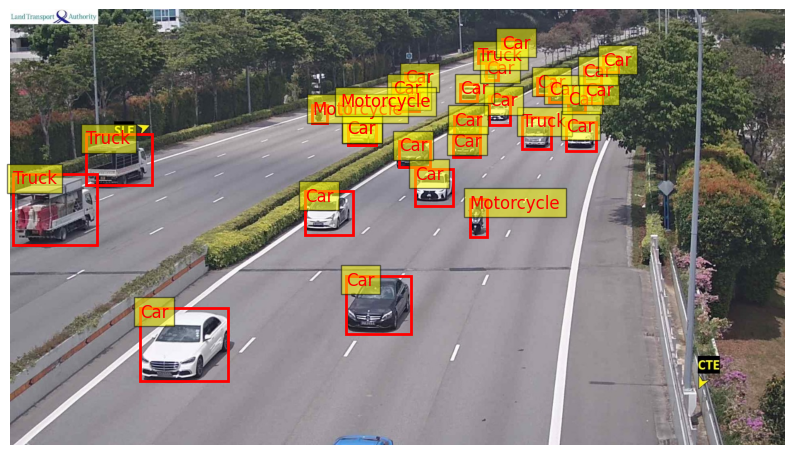

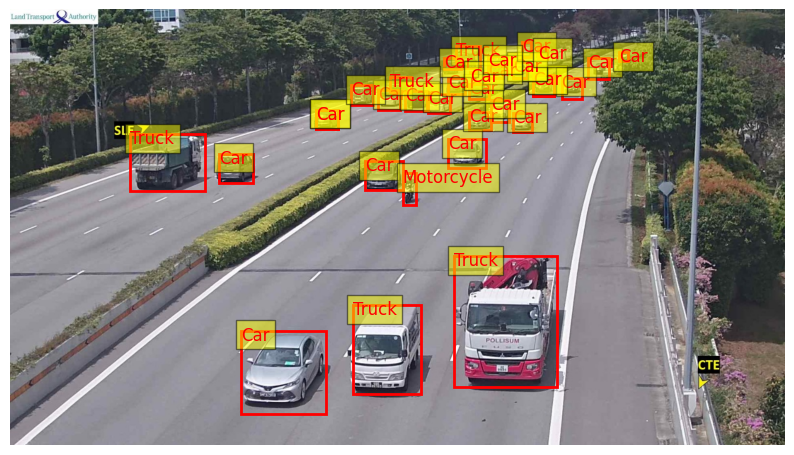

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to draw bounding boxes on an image using matplotlib
def draw_bounding_boxes(image_path, boxes, img_width, img_height):
    img = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    ax = plt.gca()
    
    for box in boxes:
        x, y, width, height, label = box
        # Normalize coordinates and dimensions
        x = x * img_width / 100
        y = y * img_height / 100
        width = width * img_width / 100
        height = height * img_height / 100
        
        rect = plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2)
        ax.add_patch(rect)
        plt.text(x, y - 10, label, color='red', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5), verticalalignment='top', horizontalalignment='left')

    plt.axis('off')
    plt.show()

# Group data by image files
grouped = label_data.groupby('file')

# Original image dimensions
img_width = 1600
img_height = 900

# Draw bounding boxes for each image
for file, group in grouped:
    boxes = group[['x', 'y', 'width', 'height', 'labels']].values
    draw_bounding_boxes(file, boxes, img_width, img_height)


In [7]:
import iUROP_custom

c:\Users\f-bon\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\detr\feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if y


fatal: destination path 'tpu' already exists and is not an empty directory.


Instructions for updating:
Use `tf.saved_model.load` instead.
INFO:tensorflow:Restoring parameters from /tmp/mask-rcnn\variables\variables
Mask RCNN loaded successfully


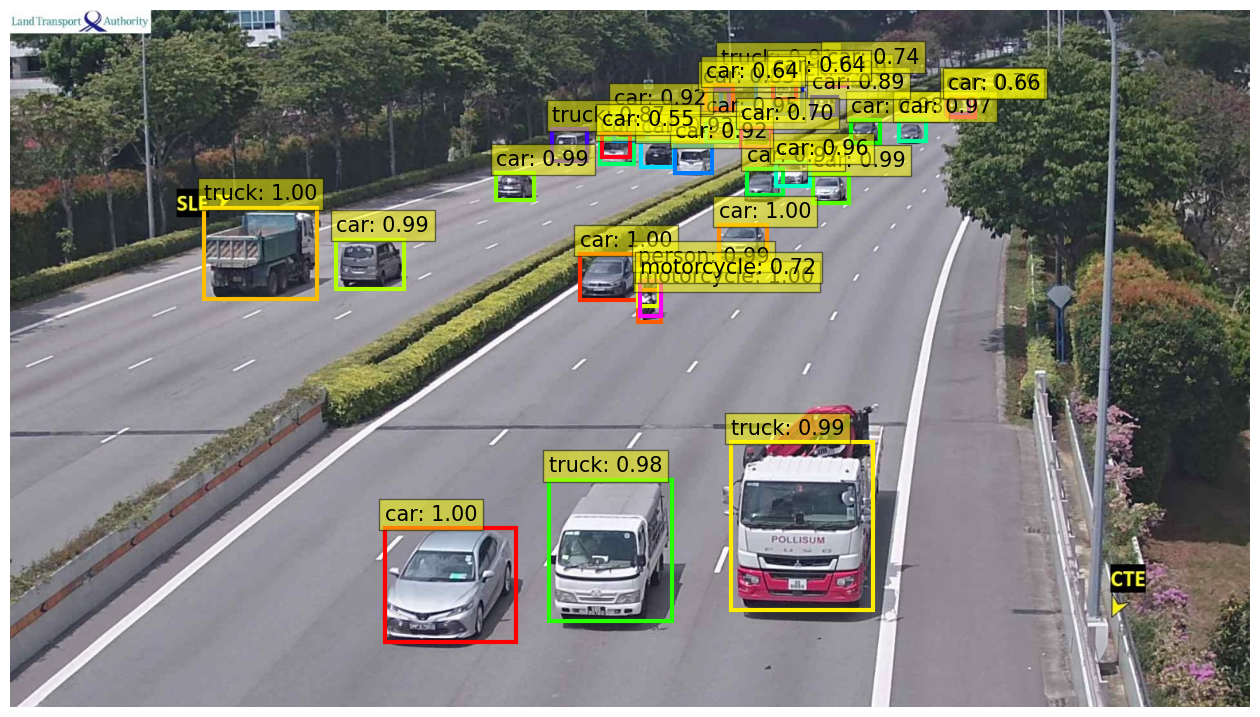

d:\AAStudium\Study\Semester_5\iUROP\iUROP_Code\iUROPCoding\ModelBenchmarking\iUROP_custom.py:271: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  benchmark_results_transformer = pd.concat([benchmark_results_transformer, row], ignore_index=True)


,URL,TIME_SG,DETECTION_TIME,CAR_COUNT,CAR_AVG_CONF,CAR_BOXES,MOTOR_CYCLE_COUNT,MC_AVG_CONF,MC_BOXES,BUS_COUNT,BUS_AVG_CONF,BUS_BOXESMC_BOXES,TRUCK_COUNT,TRUCK_AVG_CONF,TRUCK_BOXES,BUS_BOXES
0,N,N,[79.301],24,0.872482,"[[482, 668, 652, 815], [734, 315, 810, 374], [...",2,0.85792,"[[810, 361, 839, 403], [812, 349, 839, 394]]",0,N/A,NaN,6,0.939122,"[[249, 255, 395, 373], [929, 557, 1112, 773], ...",[]


In [8]:
%matplotlib inline
transformer_results, detection_time = iUROP_custom.detect_object_using_transformer('akademos/image2.jpg', visualize=True, jpeg=True)
benchmark_summary_tran = iUROP_custom.benchmark_summary_transformer([transformer_results], detection_time=[detection_time])
benchmark_summary_tran.head()

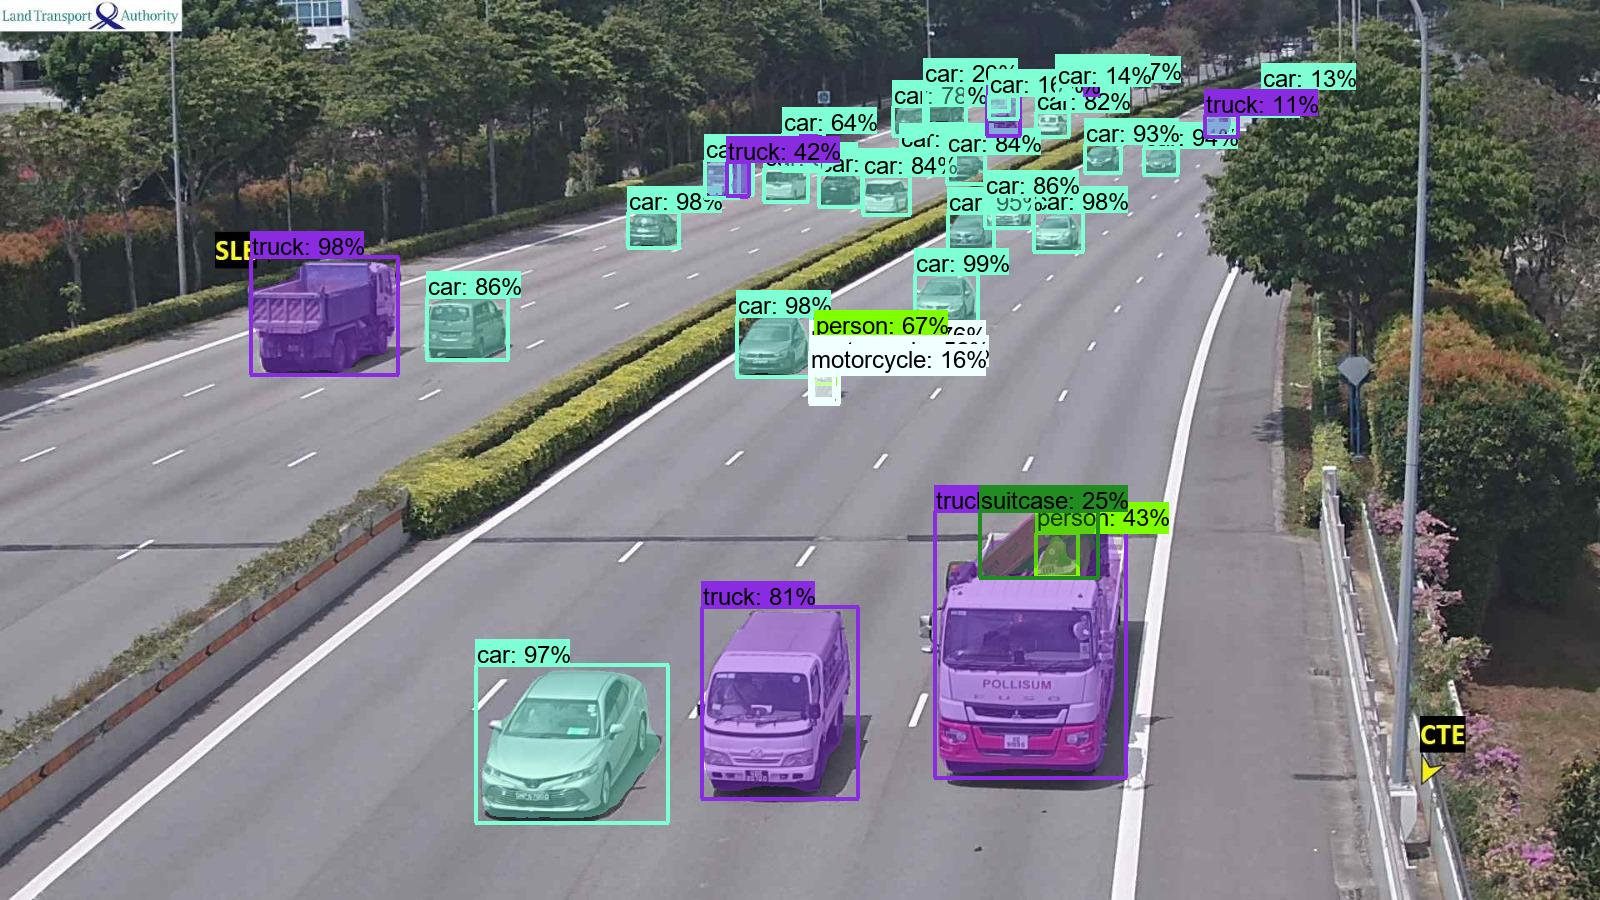

d:\AAStudium\Study\Semester_5\iUROP\iUROP_Code\iUROPCoding\ModelBenchmarking\iUROP_custom.py:598: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  benchmark_results_mask_rcnn = pd.concat([benchmark_results_mask_rcnn, row], ignore_index=True)


,URL,TIME_SG,DETECTION_TIME,CAR_COUNT,CAR_AVG_CONF,CAR_BOXES,MOTOR_CYCLE_COUNT,MC_AVG_CONF,MC_BOXES,BUS_COUNT,BUS_AVG_CONF,BUS_BOXESMC_BOXES,TRUCK_COUNT,TRUCK_AVG_CONF,TRUCK_BOXES,BUS_BOXES
0,[N/A],[N/A],773.744,37,0.58403,"[[274.80975, 914.0698, 324.63846, 978.7255], [...",3,0.499857,"[[351.15598, 809.8863, 402.21133, 838.98956], ...",0,N/A,NaN,8,0.544958,"[[257.07407, 250.85544, 374.73178, 398.22385],...",[]


In [10]:
mask_rcnn_results = iUROP_custom.detect_object_using_mask_rcnn('akademos/image2.jpg',visualize=True)
benchmark_summary_mask_rcnn = iUROP_custom.benchmark_summary_mask_rcnn([mask_rcnn_results],[["N/A"]],[["N/A"]])
benchmark_summary_mask_rcnn.head()